## Kaiming weight Initialization

## Imports

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from baseSetterHelper import setAllSeeds, setDeterministic, computeAccu
from trainerHelper import modelTrainer
from plottingHelper import plotTrainingLoss, plotAccuracy, show_examples
from dataLoaderHelper import getDataLoadersMNIST

## Settings Parameter

In [3]:
RANDOM_SEED = 123
BATCH_SIZE = 256
NUM_HIDDEN_1 = 75
NUM_HIDDEN_2 = 45
NUM_EPOCHS = 50
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [4]:
setAllSeeds(RANDOM_SEED)
setDeterministic()

## Data Loader and Data Initialization

In [5]:
trainLoader, validLoader, testLoader = getDataLoadersMNIST(
    batchSize=BATCH_SIZE,
    validFraction=0.1)

# Checking the dataset
for images, labels in trainLoader:
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:10])
    break

100%|██████████| 9912422/9912422 [00:00<00:00, 95804737.37it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 27462184.05it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 31687061.97it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4625037.33it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Image batch dimensions: torch.Size([256, 1, 28, 28])
Image label dimensions: torch.Size([256])
Class labels of 10 examples: tensor([4, 5, 8, 9, 9, 4, 9, 9, 3, 9])


## Class

In [6]:
class MultilayerPerceptron(torch.nn.Module):

    def __init__(self, numFeatures, numClasses, dropProba, numHidden1, numHidden2):
        super().__init__()

        self.my_network = torch.nn.Sequential(
            # 1st hidden layer
            torch.nn.Flatten(),
            torch.nn.Linear(numFeatures, numHidden1, bias=False),
            torch.nn.BatchNorm1d(numHidden1),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropProba),
            # 2nd hidden layer
            torch.nn.Linear(numHidden1, numHidden2, bias=False),
            torch.nn.BatchNorm1d(numHidden2),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropProba),
            # output layer
            torch.nn.Linear(numHidden2, numClasses)
        )

        for modu in self.modules():
          if (isinstance(modu,torch.nn.Linear)):
            # modu.weight.detach().normal_(0,0.001)
            torch.nn.init.kaiming_uniform_(modu.weight, mode='fan_in', nonlinearity='relu')
            if (modu.bias is not None):
              modu.bias.detach().zero_()

    def forward(self, x):
        logits = self.my_network(x)
        return logits

## Without Dropout

In [7]:
torch.manual_seed(RANDOM_SEED)
model = MultilayerPerceptron(numFeatures=28*28,
                             numHidden1=NUM_HIDDEN_1,
                             numHidden2=NUM_HIDDEN_2,
                             dropProba=0.0,
                             numClasses=10)
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


In [8]:
miniBatchLossList, trainAccList, validAccList = modelTrainer(
    model1=model,
    numEpochs=NUM_EPOCHS,
    trainLoader=trainLoader,
    valLoader=validLoader,
    testLoader=testLoader,
    opt=optimizer,
    device=DEVICE)

Epoch:001/050 | Batch:000/210 |  Cost:2.6773
Epoch:001/050 | Batch:050/210 |  Cost:0.5246
Epoch:001/050 | Batch:100/210 |  Cost:0.4270
Epoch:001/050 | Batch:150/210 |  Cost:0.3094
Epoch:001/050 | Batch:200/210 |  Cost:0.1976
Epoch:001/050 |
Train Acc 93.7519%
Val Acc   95.1667%
Time Taken: 0.29 min
Epoch:002/050 | Batch:000/210 |  Cost:0.2403
Epoch:002/050 | Batch:050/210 |  Cost:0.2162
Epoch:002/050 | Batch:100/210 |  Cost:0.2427
Epoch:002/050 | Batch:150/210 |  Cost:0.1878
Epoch:002/050 | Batch:200/210 |  Cost:0.1920
Epoch:002/050 |
Train Acc 95.6194%
Val Acc   96.1833%
Time Taken: 0.58 min
Epoch:003/050 | Batch:000/210 |  Cost:0.1668
Epoch:003/050 | Batch:050/210 |  Cost:0.1323
Epoch:003/050 | Batch:100/210 |  Cost:0.2089
Epoch:003/050 | Batch:150/210 |  Cost:0.1679
Epoch:003/050 | Batch:200/210 |  Cost:0.1332
Epoch:003/050 |
Train Acc 96.6983%
Val Acc   96.9500%
Time Taken: 0.86 min
Epoch:004/050 | Batch:000/210 |  Cost:0.1615
Epoch:004/050 | Batch:050/210 |  Cost:0.0865
Epoch:004/

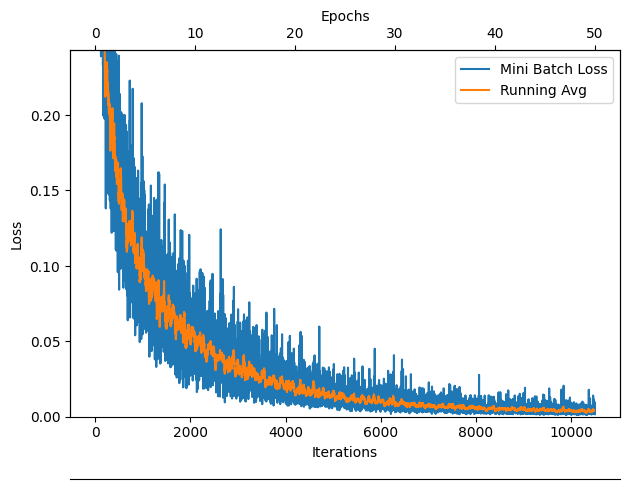

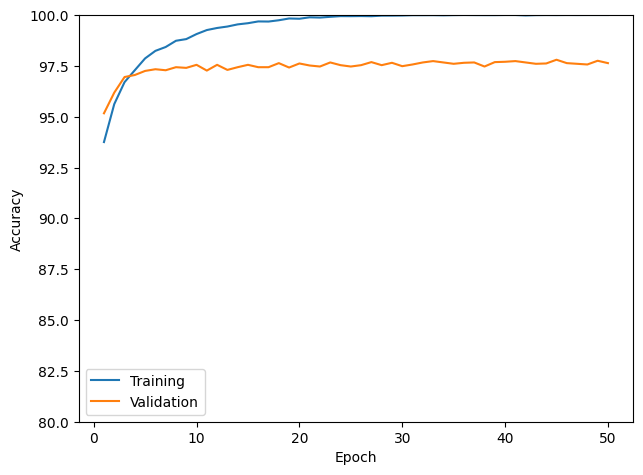

In [9]:
plotTrainingLoss(miniBatchLoss=miniBatchLossList,
                   numEpoch=NUM_EPOCHS,
                   iterPerEpoch=len(trainLoader),
                   resultsDir=None,
                   avgIter=20)    #plotTrainingLoss(miniBatchLoss,numEpoch,iterPerEpoch,resultsDir=None,avgIter = 100)
plt.show()
plotAccuracy(trainAccList,validAccList)
plt.ylim([80,100])
plt.show()

## With DropOut as 0.5

In [10]:
torch.manual_seed(RANDOM_SEED)
model = MultilayerPerceptron(numFeatures=28*28,
                             numHidden1=NUM_HIDDEN_1,
                             numHidden2=NUM_HIDDEN_2,
                             dropProba=0.5,
                             numClasses=10)
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


In [11]:
miniBatchLossList, trainAccList, validAccList = modelTrainer(
    model1=model,
    numEpochs=NUM_EPOCHS,
    trainLoader=trainLoader,
    valLoader=validLoader,
    testLoader=testLoader,
    opt=optimizer,
    device=DEVICE)

Epoch:001/050 | Batch:000/210 |  Cost:3.0338
Epoch:001/050 | Batch:050/210 |  Cost:1.3868
Epoch:001/050 | Batch:100/210 |  Cost:1.0963
Epoch:001/050 | Batch:150/210 |  Cost:1.0298
Epoch:001/050 | Batch:200/210 |  Cost:0.8879
Epoch:001/050 |
Train Acc 88.8616%
Val Acc   90.8500%
Time Taken: 0.28 min
Epoch:002/050 | Batch:000/210 |  Cost:0.7703
Epoch:002/050 | Batch:050/210 |  Cost:0.6768
Epoch:002/050 | Batch:100/210 |  Cost:0.7801
Epoch:002/050 | Batch:150/210 |  Cost:0.7130
Epoch:002/050 | Batch:200/210 |  Cost:0.7143
Epoch:002/050 |
Train Acc 90.9189%
Val Acc   92.7500%
Time Taken: 0.58 min
Epoch:003/050 | Batch:000/210 |  Cost:0.6594
Epoch:003/050 | Batch:050/210 |  Cost:0.6879
Epoch:003/050 | Batch:100/210 |  Cost:0.6898
Epoch:003/050 | Batch:150/210 |  Cost:0.5625
Epoch:003/050 | Batch:200/210 |  Cost:0.6179
Epoch:003/050 |
Train Acc 91.7150%
Val Acc   93.3833%
Time Taken: 0.86 min
Epoch:004/050 | Batch:000/210 |  Cost:0.5861
Epoch:004/050 | Batch:050/210 |  Cost:0.6288
Epoch:004/

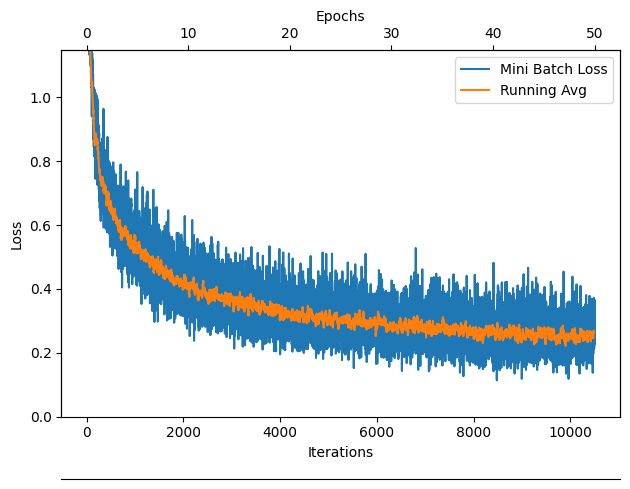

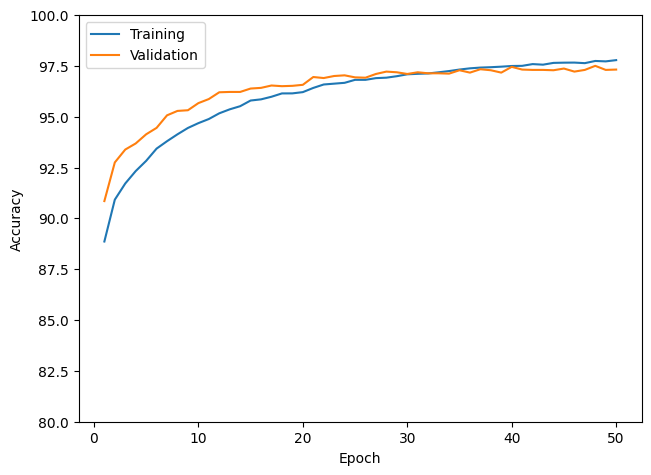

In [12]:
plotTrainingLoss(miniBatchLoss=miniBatchLossList,
                   numEpoch=NUM_EPOCHS,
                   iterPerEpoch=len(trainLoader),
                   resultsDir=None,
                   avgIter=20)    #plotTrainingLoss(miniBatchLoss,numEpoch,iterPerEpoch,resultsDir=None,avgIter = 100)
plt.show()
plotAccuracy(trainAccList,validAccList)
plt.ylim([80,100])
plt.show()

## With DropOut as 0.1

In [13]:
torch.manual_seed(RANDOM_SEED)
model = MultilayerPerceptron(numFeatures=28*28,
                             numHidden1=NUM_HIDDEN_1,
                             numHidden2=NUM_HIDDEN_2,
                             dropProba=0.1,
                             numClasses=10)
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


In [14]:
miniBatchLossList, trainAccList, validAccList = modelTrainer(
    model1=model,
    numEpochs=NUM_EPOCHS,
    trainLoader=trainLoader,
    valLoader=validLoader,
    testLoader=testLoader,
    opt=optimizer,
    device=DEVICE)

Epoch:001/050 | Batch:000/210 |  Cost:2.6899
Epoch:001/050 | Batch:050/210 |  Cost:0.6393
Epoch:001/050 | Batch:100/210 |  Cost:0.5405
Epoch:001/050 | Batch:150/210 |  Cost:0.4483
Epoch:001/050 | Batch:200/210 |  Cost:0.2944
Epoch:001/050 |
Train Acc 92.8423%
Val Acc   94.4833%
Time Taken: 0.28 min
Epoch:002/050 | Batch:000/210 |  Cost:0.2972
Epoch:002/050 | Batch:050/210 |  Cost:0.2534
Epoch:002/050 | Batch:100/210 |  Cost:0.2803
Epoch:002/050 | Batch:150/210 |  Cost:0.2779
Epoch:002/050 | Batch:200/210 |  Cost:0.2219
Epoch:002/050 |
Train Acc 94.7433%
Val Acc   95.9000%
Time Taken: 0.58 min
Epoch:003/050 | Batch:000/210 |  Cost:0.2380
Epoch:003/050 | Batch:050/210 |  Cost:0.2795
Epoch:003/050 | Batch:100/210 |  Cost:0.2320
Epoch:003/050 | Batch:150/210 |  Cost:0.2247
Epoch:003/050 | Batch:200/210 |  Cost:0.1728
Epoch:003/050 |
Train Acc 95.7347%
Val Acc   96.5500%
Time Taken: 0.86 min
Epoch:004/050 | Batch:000/210 |  Cost:0.1717
Epoch:004/050 | Batch:050/210 |  Cost:0.2274
Epoch:004/

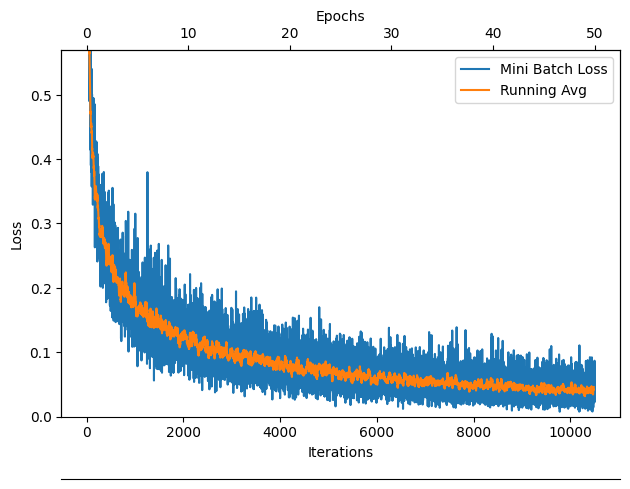

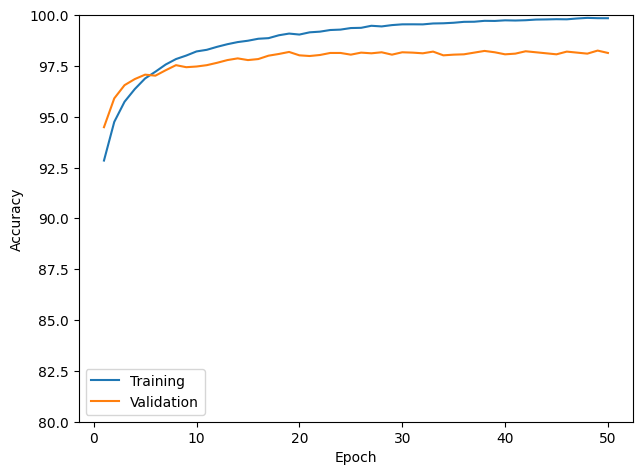

In [15]:
plotTrainingLoss(miniBatchLoss=miniBatchLossList,
                   numEpoch=NUM_EPOCHS,
                   iterPerEpoch=len(trainLoader),
                   resultsDir=None,
                   avgIter=20)    #plotTrainingLoss(miniBatchLoss,numEpoch,iterPerEpoch,resultsDir=None,avgIter = 100)
plt.show()
plotAccuracy(trainAccList,validAccList)
plt.ylim([80,100])
plt.show()

## With dropOut as 0.1 and 100 iterations

In [16]:
torch.manual_seed(RANDOM_SEED)
model = MultilayerPerceptron(numFeatures=28*28,
                             numHidden1=NUM_HIDDEN_1,
                             numHidden2=NUM_HIDDEN_2,
                             dropProba=0.1,
                             numClasses=10)
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# print(model.dropProba)

In [17]:
miniBatchLossList, trainAccList, validAccList = modelTrainer(
    model1=model,
    numEpochs=NUM_EPOCHS+50,
    trainLoader=trainLoader,
    valLoader=validLoader,
    testLoader=testLoader,
    opt=optimizer,
    device=DEVICE)

Epoch:001/100 | Batch:000/210 |  Cost:2.6899
Epoch:001/100 | Batch:050/210 |  Cost:0.6393
Epoch:001/100 | Batch:100/210 |  Cost:0.5405
Epoch:001/100 | Batch:150/210 |  Cost:0.4483
Epoch:001/100 | Batch:200/210 |  Cost:0.2944
Epoch:001/100 |
Train Acc 92.8423%
Val Acc   94.4833%
Time Taken: 0.29 min
Epoch:002/100 | Batch:000/210 |  Cost:0.2972
Epoch:002/100 | Batch:050/210 |  Cost:0.2534
Epoch:002/100 | Batch:100/210 |  Cost:0.2803
Epoch:002/100 | Batch:150/210 |  Cost:0.2779
Epoch:002/100 | Batch:200/210 |  Cost:0.2219
Epoch:002/100 |
Train Acc 94.7433%
Val Acc   95.9000%
Time Taken: 0.59 min
Epoch:003/100 | Batch:000/210 |  Cost:0.2380
Epoch:003/100 | Batch:050/210 |  Cost:0.2795
Epoch:003/100 | Batch:100/210 |  Cost:0.2320
Epoch:003/100 | Batch:150/210 |  Cost:0.2247
Epoch:003/100 | Batch:200/210 |  Cost:0.1728
Epoch:003/100 |
Train Acc 95.7347%
Val Acc   96.5500%
Time Taken: 0.87 min
Epoch:004/100 | Batch:000/210 |  Cost:0.1717
Epoch:004/100 | Batch:050/210 |  Cost:0.2274
Epoch:004/

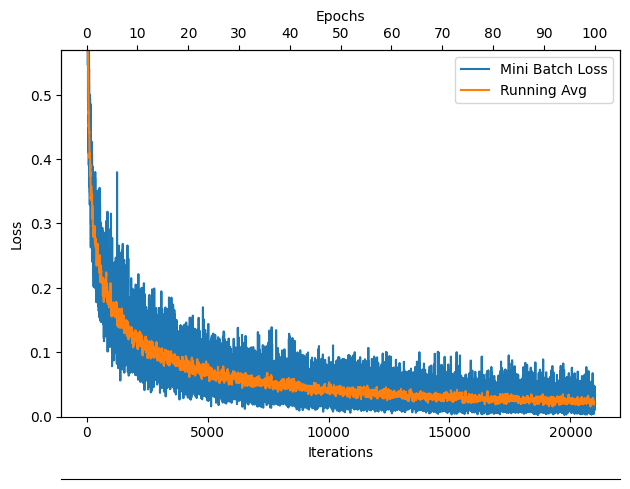

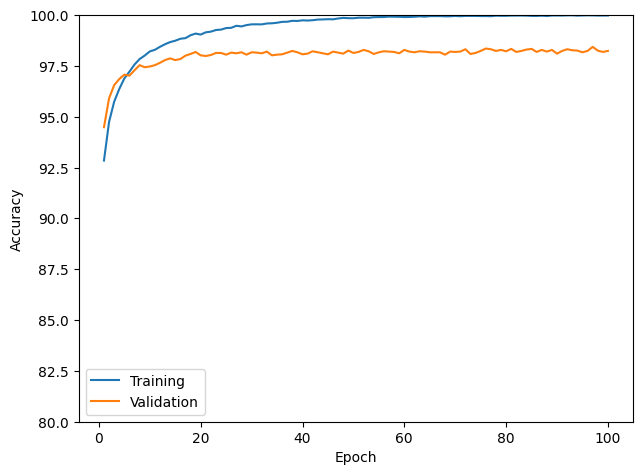

In [18]:
plotTrainingLoss(miniBatchLoss=miniBatchLossList,
                   numEpoch=NUM_EPOCHS+50,
                   iterPerEpoch=len(trainLoader),
                   resultsDir=None,
                   avgIter=20)    #plotTrainingLoss(miniBatchLoss,numEpoch,iterPerEpoch,resultsDir=None,avgIter = 100)
plt.show()
plotAccuracy(trainAccList,validAccList)
plt.ylim([80,100])
plt.show()